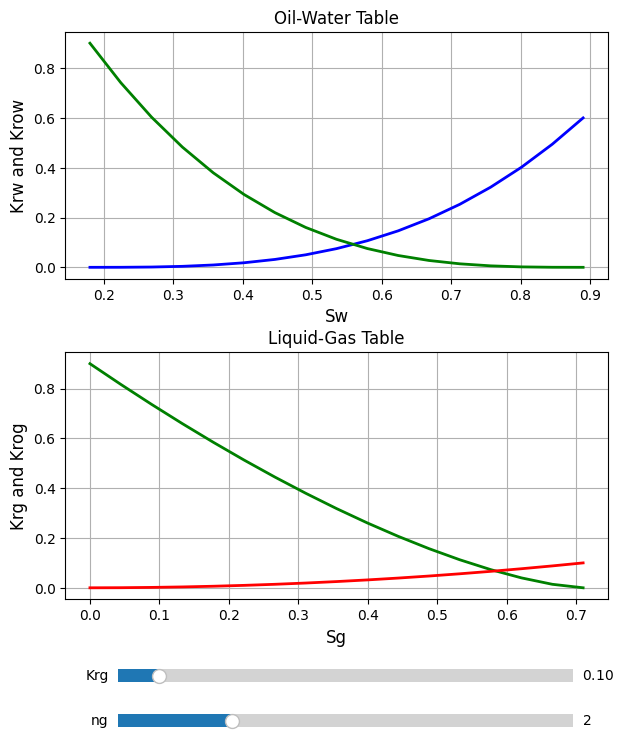

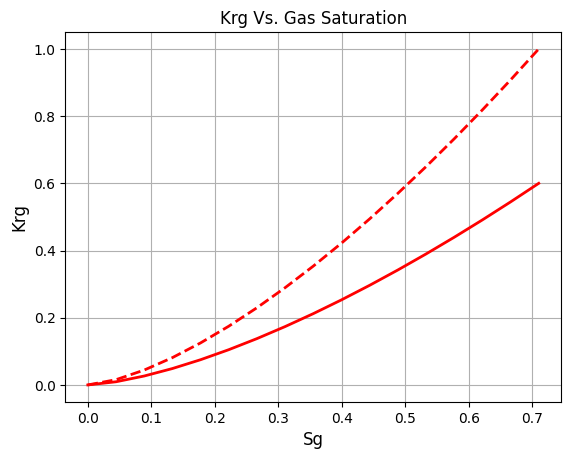

In [1]:
####################################################################################################

# Author: Mouin Almasoodi, PhD
# Objective: 3-Phase Relative Perm Model

# %%#####################################(Tools Needed for Analysis)#################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# %%#####################################(INPUTS)################################

# Saturations
Swcon = Swirr = Swcrit = 0.18
Soirw = Sorw = 0.11
Soirg = Sorg = 0.11
Sgcon = Sgc = 0

# Max Relative Perm - endpoints
krw_sgc = 0.6
krg_Swirr = Krgcl = 0.1
Krocw = Kro_swirr_ = Krogcg = 0.9
Krwiro = krw_sgc = 0.6

# Corey Exponents
now = 3
nw = 3
ng = 2
nog = 1.5

# %%#####################################(Equations Used)################################

# Krw = Krwiro * ((Sw - Swcrit)/(1.0 - Swcrit - Soirw)) ^ Nw
# Krow = Krocw  * ((So - Sorw  )/(1.0 - Swcon  - Sorw )) ^ Now
# Krog = Krogcg * ((Sl - Sorg  - Swcon)/(1.0 - Sgcon  - Sorg  - Swcon)) ^ Nog
# Krg = Krgcl * ((Sg - Sgcrit)/(1.0 - Sgcrit - Soirg - Swcon)) ^ Ng

# %%#####################################(Water-oil Table)################################

# Create Water-oil Table
SWT = pd.DataFrame()

# create SW column
SWT['Sw'] = (np.linspace(0.18, (1 - Sorw), 17, endpoint=True))
# Evaluate Krw
SWT['Krw'] = Krwiro * ((SWT['Sw'] - Swcrit) / (1.0 - Swcrit - Soirw)) ** nw
# Evaluate So
So = 1 - SWT['Sw']
# Evaluate Krow
SWT['Krow'] = Krocw * ((So - Sorw) / (1.0 - Swcon - Sorw)) ** now
# Hard code 0 for the last value in Krow column to avoid null and negative values
SWT['Krow'].iloc[-1] = 0

fig, ax = plt.subplots(2, 1, figsize=(7, 9))
plt.subplots_adjust(left=None, bottom=0.25, right=None, top=None, wspace=0.2, hspace=0.3)

ax[0].set_title('Oil-Water Table')
ax[0].plot(SWT['Sw'], SWT['Krw'], lw=2, color='blue')
ax[0].plot(SWT['Sw'], SWT['Krow'], lw=2, color='green')
ax[0].set_xlabel("Sw", fontsize=12)
ax[0].set_ylabel("Krw and Krow", fontsize=12)
ax[0].grid(which='both')

# %%#####################################(Gas-Liquid Table)################################

# Create Gas-Liquid Table
SGT = pd.DataFrame()

# saturation of liquid
SL = (np.linspace(Swirr + Sorg, (1 - Sgc), 17, endpoint=True))
# Saturation of gas
SGT['Sg'] = (np.linspace(Sgc, (1 - (Swirr + Sorg)), 17, endpoint=True))
# Evaluate Krg
SGT['Krg'] = Krgcl * ((SGT['Sg'] - Sgc) / (1.0 - Sgc - Soirg - Swcon)) ** ng
# Evaluate Krog
SGT['Krog'] = Krogcg * ((SL - Sorg - Swcon) / (1.0 - Sgcon - Sorg - Swcon)) ** nog
# Reverse Krog Values to use in SGT table
SGT['Krog'] = SGT['Krog'].values[::-1]

ax[1].set_title('Liquid-Gas Table')

# ax[1].plot( SGT['Sg'], SGT['Krg'], '--r', lw = 2)
ax[1].plot(SGT['Sg'], SGT['Krog'], lw=2, color='green')
ax[1].set_xlabel("Sg", fontsize=12)
ax[1].set_ylabel("Krg and Krog", fontsize=12)
ax[1].grid(which='both')


# %%######## Creating Krg Interactive Plot #################################


# Define function for Krg to use in the interactive plot
def Krg(Krgcl, ng):
    Krg_temp = Krgcl * ((SGT['Sg'] - Sgc) / (1.0 - Sgc - Soirg - Swcon)) ** ng
    return Krg_temp


# Call the function
Krg(Krgcl, ng)

# Initial plot using the function
line0, = ax[1].plot(SGT['Sg'], Krg(Krgcl, ng), lw=2, color='red')

# set the color for the slider
axis_color = 'lightgoldenrodyellow'

# Define an axes area and draw a slider in it
Krgcl_slider_ax = fig.add_axes([0.2, 0.15, 0.65, 0.03], facecolor=axis_color)
Krgcl_slider = Slider(Krgcl_slider_ax, 'Krg', 0.01, 1, valinit=krg_Swirr)

# Draw another slider
Ng_slider_ax = fig.add_axes([0.2, 0.1, 0.65, 0.03], facecolor=axis_color)
Ng_slider = Slider(Ng_slider_ax, 'ng', 1, 5, valinit=ng)


# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line0.set_ydata(Krg(Krgcl_slider.val, Ng_slider.val))
    fig.canvas.draw_idle()


Krgcl_slider.on_changed(sliders_on_changed)
Ng_slider.on_changed(sliders_on_changed)

###Bonus
# %%#####################################(Multiple Krg Plot)################################
fig, ax2 = plt.subplots()
ax2.set_title('Krg Vs. Gas Saturation')
ax2.set_xlabel("Sg", fontsize=12)
ax2.set_ylabel("Krg", fontsize=12)
ax2.grid(which='both')

Krgcl = [0.6, 1]
ng = [1.5, 1.5]
linestyle = ['solid', 'dashed']

# loop to evalute and plot multiple Krg curves
for i, j, k in zip(Krgcl, ng, linestyle):
    SGT['Krg'] = i * ((SGT['Sg'] - Sgc) / (1.0 - Sgc - Soirg - Swcon)) ** j
    ax2.plot(SGT['Sg'], SGT['Krg'], lw=2, color='red', linestyle=k)

